In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [5]:
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
state = 'AL'

In [7]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)


In [8]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [9]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [10]:
symptoms_df['cj_living_area'] = symptoms_dataframe_ri['cj_living_area']
symptoms_df['avmValue'] = symptoms_dataframe_ri['avmValue']

In [11]:
Predictors = symptoms_df.to_numpy()

In [12]:
Predictors.shape

(205759, 2226)

In [64]:
for i in range(Predictors.shape[1]):
    Predictors[:,i]=(Predictors[:,i]-np.mean(Predictors[:,i]))/np.std(Predictors[:,i])

In [65]:
predictand = symptoms_dataframe_ri.avmerror.values

In [66]:
predictand.shape

(205759,)

In [369]:
train_samples = 150000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=True,
    test_size=len(Predictors) - train_samples,
)

In [370]:
X_train.shape

(150000, 2226)

In [371]:
from tensorflow.keras import datasets, layers, models

In [424]:
# Model definition

model_NN_Class = keras.Sequential()
model_NN_Class.add(keras.layers.Dense(40, activation='tanh', input_dim=2226))
#model_NN_Class.add(keras.layers.BatchNormalization())
#model_NN_Class.add(keras.layers.Dropout(0.1))
model_NN_Class.add(keras.layers.Dense(20, activation='tanh'))
#model_NN_Class.add(keras.layers.BatchNormalization())
#model_NN_Class.add(keras.layers.Dropout(0.1))
model_NN_Class.add(keras.layers.Dense(1, activation='linear', use_bias =True))

In [425]:
y_train.shape

(150000,)

In [426]:
optimizer = keras.optimizers.Adam(learning_rate=0.02)
#, decay=5e-4
model_NN_Class.compile(loss='mean_absolute_error', optimizer=optimizer)

In [427]:

history = model_NN_Class.fit(X_train, y_train, epochs=30, batch_size=1000)


Epoch 1/30
150/150 [==============================] - ETA: 0s - loss: 0.175 - 2s 10ms/step - loss: 0.1748
Epoch 2/30
150/150 [==============================] - 2s 12ms/step - loss: 0.1350
Epoch 3/30
150/150 [==============================] - 2s 12ms/step - loss: 0.1327
Epoch 4/30
150/150 [==============================] - 3s 20ms/step - loss: 0.1316
Epoch 5/30
150/150 [==============================] - 2s 12ms/step - loss: 0.1306
Epoch 6/30
150/150 [==============================] - 3s 22ms/step - loss: 0.1298
Epoch 7/30
150/150 [==============================] - 4s 23ms/step - loss: 0.1290
Epoch 8/30
150/150 [==============================] - 4s 24ms/step - loss: 0.1287
Epoch 9/30
150/150 [==============================] - 2s 14ms/step - loss: 0.1282
Epoch 10/30
150/150 [==============================] - 3s 23ms/step - loss: 0.1280
Epoch 11/30
150/150 [==============================] - 4s 27ms/step - loss: 0.1278
Epoch 12/30
150/150 [==============================] - 3s 23ms/step - lo

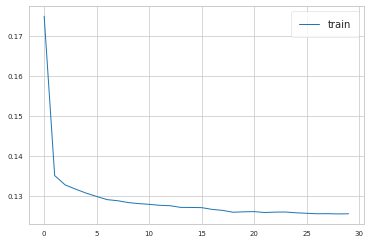

In [430]:
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 

In [431]:
model_NN_Class.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 40)                89080     
_________________________________________________________________
dense_122 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 21        
Total params: 89,921
Trainable params: 89,921
Non-trainable params: 0
_________________________________________________________________


In [432]:
predictions_test = model_NN_Class.predict(X_test)
predictions_train = model_NN_Class.predict(X_train)

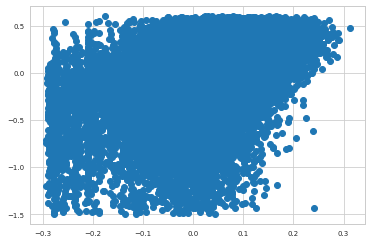

In [433]:
plt.plot(predictions_train,y_train,'o')

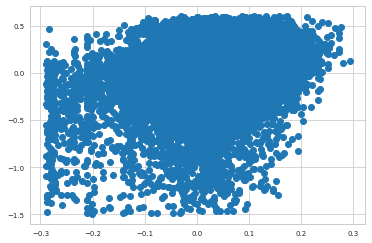

In [434]:
plt.plot(predictions_test,y_test,'o')

In [418]:
predictions_test[:,0].shape

(55759,)

In [419]:
 symptoms_dataframe_ri['avmValue'].values[train_samples:]/(1-predictions_test[:,0])

array([299310.15579765, 161179.28526304, 209802.12945165, ...,
       170439.18620284, 120652.61607207, 101351.54013503])

In [420]:
df = symptoms_dataframe_ri.copy()

In [421]:
predictions_test_value = symptoms_dataframe_ri['avmValue'].values[train_samples:]/(1-predictions_test[:,0])
predictions_train_value = symptoms_dataframe_ri['avmValue'].values[:train_samples]/(1-predictions_train[:,0])
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [422]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.16470483439171885
0.14185532301003315


In [423]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.14829017724193833
0.12433022988479138


In [34]:

filename = 'RF_newmodel_01_3mins.h5'
model_NN_Class.save(filename)